# Cognitive Computing - vgg16

In [2]:
train_data_dir = '/Volumes/lulu/landmark/train'
validation_data_dir = '/Volumes/lulu/landmark/test'
img_height, img_width = 224, 224
img_dim = 3
batch_size = 32

## 1. define model using transfer learning 

In [3]:
from keras import applications
from keras.layers import Input,Dense,Flatten,Dropout
from keras.models import Sequential, Model, load_model
from keras import optimizers

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_dim ))

for layer in base_model.layers:
   layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(20, activation="softmax")(x)


model = Model(input=base_model.input, output=predictions)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

/Applications/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_______________________________________________________

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


## 2.enlarge dataset by modifing the pictures 

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=30)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_height, img_width),
        batch_size = batch_size, 
        class_mode = "categorical")

test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_height, img_width),
        class_mode = "categorical")


Found 12040 images belonging to 20 classes.
Found 3000 images belonging to 20 classes.


In [6]:
label_map = (validation_generator.class_indices)

In [21]:
label_map_ = {
    'Kurhaus of Scheveningen':0,
    'Rosary Basilica':1,
    'Innsbruck':2,
    'Chepstow Castle':3,
    'Tiger Leaping Gorge':4,
    "Clifford's Tower, York":5,
    "saint peter's basilica, statue of saint gregory the illuminator":6,
    "statue of decebalus":7,
    "Galleria Borghese":8,
    "rotunda of mosta":9,
    "baochu pagoda":10,
    "latvian academy of sciences":11,
    "delaware memorial bridge":12,
    "St. Francis Xavier Chapel":13,
    "vall de núria":14,
    "Eltz Castle":15,
    "chinatown":16,
    "lácar lake":17,
    "london coliseum":18,
    "lubart's castle":19
    
}

## 3.train the data

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=300,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=100)

Since the training process takes too long, training log is attached.

Epoch 1/25 <br>
300/300 [==============================] - 3130s 10s/step - loss: 2.8609 - acc: 0.1407 - val_loss: 2.5095 - val_acc: 0.4467<br>
Epoch 2/25<br>
300/300 [==============================] - 3158s 11s/step - loss: 2.4527 - acc: 0.3067 - val_loss: 2.0826 - val_acc: 0.5266<br>
Epoch 3/25<br>
300/300 [==============================] - 3162s 11s/step - loss: 2.1399 - acc: 0.3997 - val_loss: 1.7758 - val_acc: 0.5699<br>
Epoch 4/25<br>
300/300 [==============================] - 3359s 11s/step - loss: 1.8696 - acc: 0.4812 - val_loss: 1.5488 - val_acc: 0.6062<br>
Epoch 5/25<br>
300/300 [==============================] - 3218s 11s/step - loss: 1.7065 - acc: 0.5138 - val_loss: 1.4059 - val_acc: 0.6216<br>
Epoch 6/25<br>
300/300 [==============================] - 3283s 11s/step - loss: 1.5679 - acc: 0.5541 - val_loss: 1.2485 - val_acc: 0.6773<br>
Epoch 7/25<br>
300/300 [==============================] - 3217s 11s/step - loss: 1.4367 - acc: 0.5868 - val_loss: 1.1554 - val_acc: 0.6996<br>
Epoch 8/25<br>
300/300 [==============================] - 3475s 12s/step - loss: 1.3874 - acc: 0.5964 - val_loss: 1.0714 - val_acc: 0.7231<br>
Epoch 9/25<br>
300/300 [==============================] - 3233s 11s/step - loss: 1.3001 - acc: 0.6337 - val_loss: 1.0222 - val_acc: 0.7337<br>
Epoch 10/25<br>
300/300 [==============================] - 3344s 11s/step - loss: 1.2151 - acc: 0.6559 - val_loss: 0.9678 - val_acc: 0.7425<br>
Epoch 11/25<br>
300/300 [==============================] - 3281s 11s/step - loss: 1.1698 - acc: 0.6638 - val_loss: 0.9148 - val_acc: 0.7578<br>
Epoch 12/25<br>
300/300 [==============================] - 3344s 11s/step - loss: 1.1340 - acc: 0.6733 - val_loss: 0.8783 - val_acc: 0.7578<br>
Epoch 13/25<br>
300/300 [==============================] - 3253s 11s/step - loss: 1.0796 - acc: 0.6868 - val_loss: 0.8440 - val_acc: 0.7710<br>
Epoch 14/25<br>
300/300 [==============================] - 3190s 11s/step - loss: 1.0523 - acc: 0.6913 - val_loss: 0.8222 - val_acc: 0.7738<br>
Epoch 15/25<br>
300/300 [==============================] - 3188s 11s/step - loss: 1.0188 - acc: 0.7089 - val_loss: 0.7897 - val_acc: 0.7867<br>
Epoch 16/25<br>
300/300 [==============================] - 3184s 11s/step - loss: 0.9792 - acc: 0.7171 - val_loss: 0.7670 - val_acc: 0.7882<br>
Epoch 17/25<br>
300/300 [==============================] - 3146s 10s/step - loss: 0.9604 - acc: 0.7194 - val_loss: 0.7287 - val_acc: 0.8017<br>
Epoch 18/25<br>
300/300 [==============================] - 3151s 11s/step - loss: 0.9355 - acc: 0.7287 - val_loss: 0.7291 - val_acc: 0.7895<br>
Epoch 19/25<br>
300/300 [==============================] - 3146s 10s/step - loss: 0.9094 - acc: 0.7352 - val_loss: 0.7003 - val_acc: 0.8039<br>
Epoch 20/25<br>
300/300 [==============================] - 3166s 11s/step - loss: 0.8839 - acc: 0.7455 - val_loss: 0.6916 - val_acc: 0.8098<br>
Epoch 21/25<br>
300/300 [==============================] - 3171s 11s/step - loss: 0.8766 - acc: 0.7424 - val_loss: 0.6602 - val_acc: 0.8180<br>
Epoch 22/25<br>
300/300 [==============================] - 3145s 10s/step - loss: 0.8304 - acc: 0.7555 - val_loss: 0.6360 - val_acc: 0.8214<br>
Epoch 23/25<br>
300/300 [==============================] - 3163s 11s/step - loss: 0.8271 - acc: 0.7571 - val_loss: 0.6311 - val_acc: 0.8230<br>
Epoch 24/25<br>
300/300 [==============================] - 3121s 10s/step - loss: 0.8052 - acc: 0.7668 - val_loss: 0.6331 - val_acc: 0.8142<br>
Epoch 25/25<br>
300/300 [==============================] - 3262s 11s/step - loss: 0.8065 - acc: 0.7669 - val_loss: 0.5958 - val_acc: 0.8311

In [ ]:
#save model 
import h5py
model.save('vgg16.h5')   
del model

# Demo

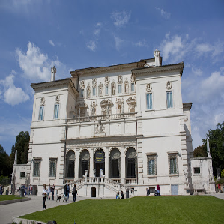

In [8]:
# load imgae need to predict 
from keras.preprocessing import image
import numpy as np

file_path = '/Users/lulu/Desktop/landmark/demo/6b847c554504d347.png'  
  
img = image.load_img(file_path, target_size=(224, 224))  
x = image.img_to_array(img)  
x = np.expand_dims(x, axis=0) 
img

In [9]:
# load best model trained 
from keras.models import load_model
model = load_model('/Users/lulu/Desktop/landmark/demo/vgg16.h5')

In [23]:
# predict
y_prob = model.predict(x) 
y_classes = list(label_map_.keys())[int(y_prob.argmax(axis=-1))]

print(y_classes)

Galleria Borghese
